In [ ]:
!gdown 1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R

Downloading...
From: https://drive.google.com/uc?id=1g1nwk4k-h9FceEHKZc8ocfu_xp3xnZ8R
To: /content/hr.csv
100% 580k/580k [00:00<00:00, 113MB/s]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('hr.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,age
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000,3080.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934,0.144561,0.021261,27.018506
std,0.248628,0.171163,1.232550,49.937662,1.460012,0.351670,0.144258,1.429511
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,25.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,26.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,27.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,28.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,29.000000


### Assumption `Promotion in 5 years` and `left` as Target Variable

In [ ]:
df['promotion_last_5years'].value_counts()

0    14685
1      319
Name: promotion_last_5years, dtype: int64

<Axes: >

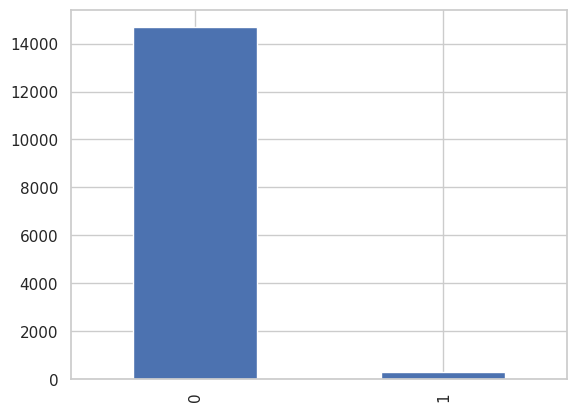

In [ ]:
df['promotion_last_5years'].value_counts().plot(kind='bar')

In [ ]:
df['age'].value_counts()

29.0    645
25.0    628
28.0    612
27.0    606
26.0    589
Name: age, dtype: int64

Since age are under 25 - 30, it's possible that the 'age' feature may not have a strong impact on the target variable. Even high number of missing values in age, filing an age values will give same age range. So, we can drop the 'age' feature.

In [ ]:
df.drop('age', axis=1, inplace=True)

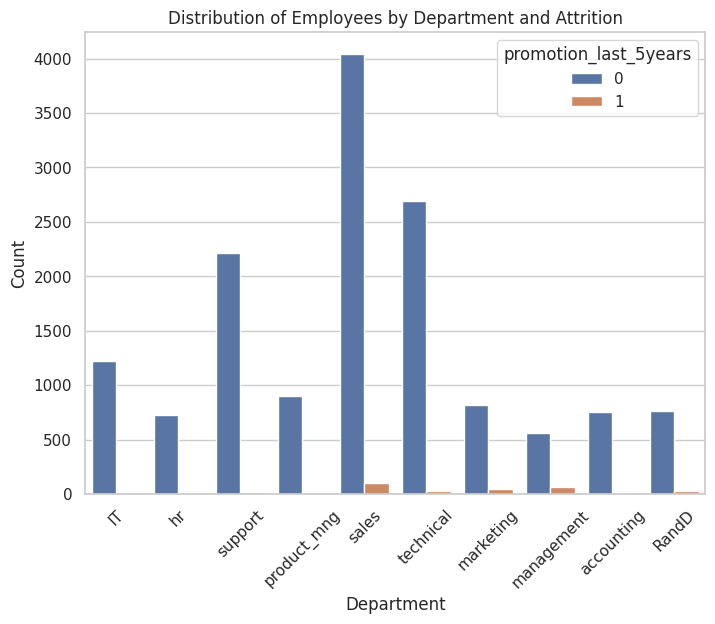

In [ ]:
# EDA for 'Department' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department', hue='promotion_last_5years')
plt.title("Distribution of Employees by Department and Attrition")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title='promotion_last_5years')
plt.xticks(rotation=45)
plt.show()

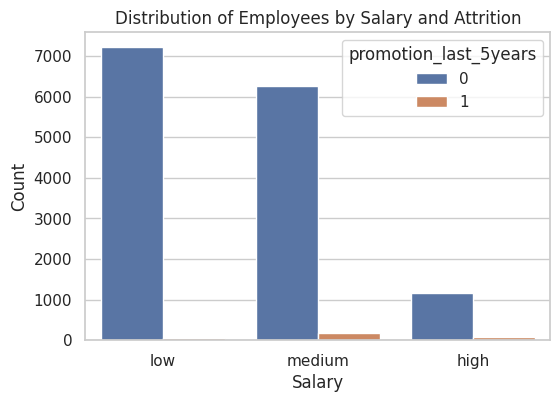

In [ ]:
# EDA for 'salary' distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='salary', hue='promotion_last_5years')
plt.title("Distribution of Employees by Salary and Attrition")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(title='promotion_last_5years')
plt.show()

Higher salary levels might be associated with more experienced and higher-performing employees, potentially increasing their chances of promotion.

In [ ]:
# Group by 'Department' and calculate the number of missing values in 'salary'
missing_counts = df.groupby('promotion_last_5years')['salary'].apply(lambda x: x.isnull().sum())

# Create a summary table
missing_summary = pd.DataFrame({'Missing Count': missing_counts})

# Print the summary table
print(missing_summary)

                       Missing Count
promotion_last_5years               
0                                 29
1                                  0


##### Filling Missing Values 'salary' with mode (most frequent)

In [ ]:
df['salary'].fillna(df['salary'].mode()[0], inplace=True)

In [ ]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_mapping).astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 15004 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Target Variable `promotion_last_5years`

<ipython-input-44-80c43c0ac611>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


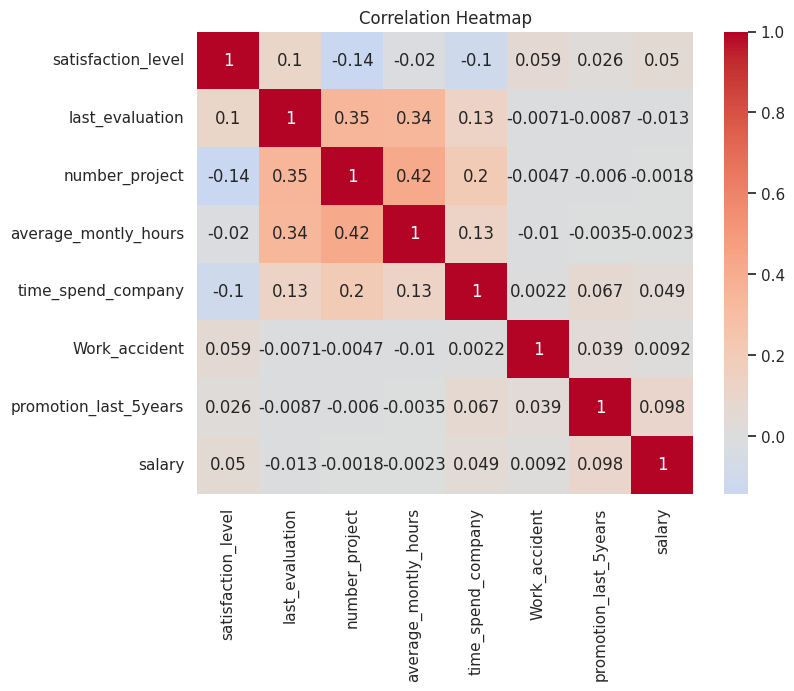

In [ ]:
# EDA for correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

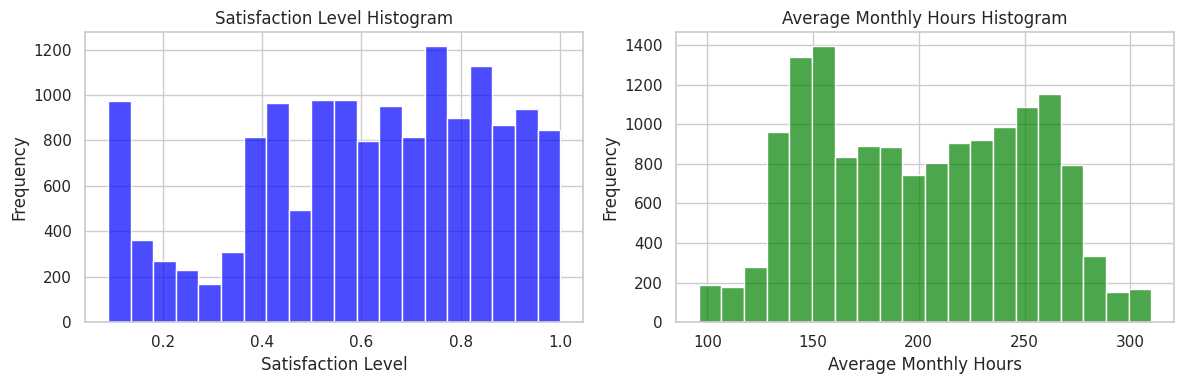

In [ ]:
# Set the style of the plot
sns.set(style='whitegrid')

plt.figure(figsize=(12, 4))

# Plot the Satisfaction Level Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='satisfaction_level', bins=20, color='blue', alpha=0.7)
plt.title('Satisfaction Level Histogram')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')


# Plot the Average Monthly Hours Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average_montly_hours', bins=20, color='green', alpha=0.7)
plt.title('Average Monthly Hours Histogram')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


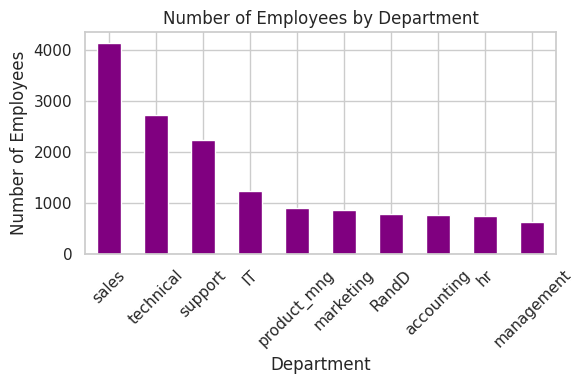

In [ ]:
plt.figure(figsize=(6, 4))
df['Department'].value_counts().plot(kind='bar', color='purple')
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
dep = df['Department'].unique().copy()
# dep.tolist()

In [ ]:
# Encode categorical variables ('salary' and 'Department')
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])

**Spliting data for target variable and features**

Target Variable ``promotion_last_5years``

In [ ]:
# Split data into features (X) and target (y)
X = df.drop(['left','promotion_last_5years'], axis=1)
y = df['promotion_last_5years']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model

In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(knn_accuracy)

0.9820059980006665


# Logistic Regression

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=5000)
logreg_model.fit(X_train_scaled, y_train)
logreg_predictions = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(logreg_accuracy)

0.9813395534821726


# Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(dt_accuracy)

0.9823392202599134


## Model Performance Comparision

In [ ]:
# Generate confusion matrix and classification report for each model
models = ['KNN', 'Logistic Regression', 'Decision Tree']
predictions = [knn_predictions, logreg_predictions, dt_predictions]

for model_name, y_pred in zip(models, predictions):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("="*50)
    print("\n\n")


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2945
           1       0.60      0.11      0.18        56

    accuracy                           0.98      3001
   macro avg       0.79      0.55      0.59      3001
weighted avg       0.98      0.98      0.98      3001




Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2945
           1       0.00      0.00      0.00        56

    accuracy                           0.98      3001
   macro avg       0.49      0.50      0.50      3001
weighted avg       0.96      0.98      0.97      3001




Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2945
           1       0.64      0.12      0.21        56

    accuracy                           0.98      3001
   

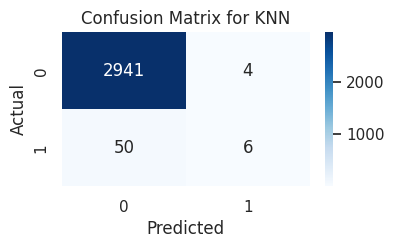

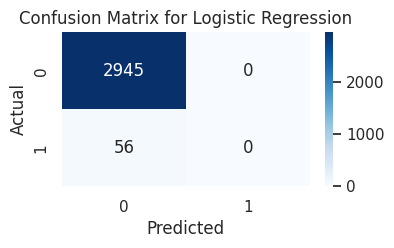

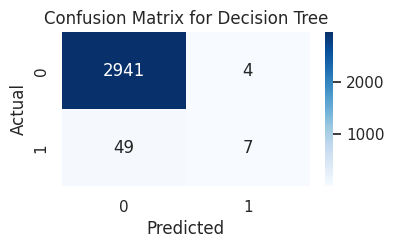

In [ ]:
for model_name, y_pred in zip(models, predictions):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n\n")


# Another Target Variable ``left``

In [ ]:
new_df = df.copy()

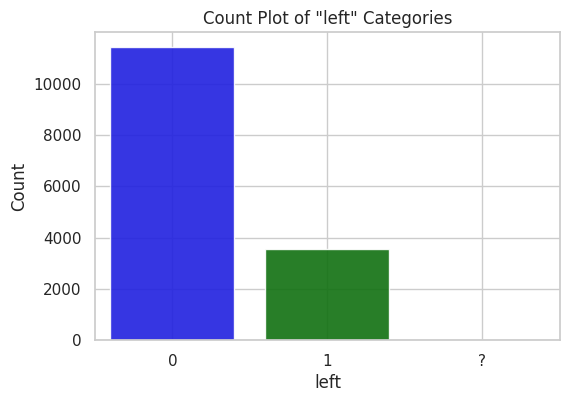

In [ ]:
# Plot count plot of 'left' categories
colors = ['blue', 'green', 'red']

plt.figure(figsize=(6, 4))
sns.countplot(data=new_df, x='left',palette = colors, alpha=0.9)
plt.title('Count Plot of "left" Categories')
plt.xlabel('left')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
new_df.loc[new_df['left'] == '?']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7864,0.72,0.67,5,210,2,0,?,0,4,2
8309,0.96,0.54,3,198,3,0,?,0,8,1
10830,0.55,0.96,3,194,3,0,?,0,6,2
12652,0.96,0.75,4,177,2,0,?,0,0,1


Since our target variable is the 'left' column and it appears that there are missing values represented as '?' in this column, there are main two option:
* Fill missing values with the most frequent value (This would allow to retain the information from the other columns for your analysis)
* Drop the 'left' column

Since there are less numbers of missing values, I will drop the 'left' column

In [ ]:
new_df = df[df['left'] != '?']


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15003
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_montly_hours   15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  object 
 7   promotion_last_5years  15000 non-null  int64  
 8   Department             15000 non-null  int64  
 9   salary                 15000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.3+ MB


In [ ]:
new_df['left'].value_counts()

0    11428
1     3572
Name: left, dtype: int64

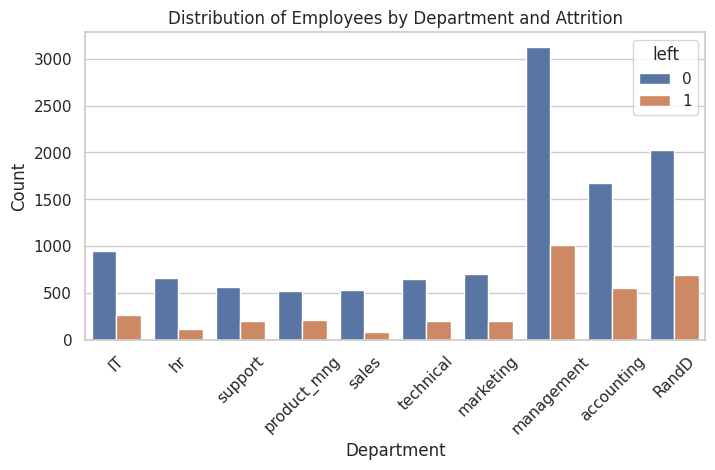

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=new_df, x='Department', hue='left')
plt.title("Distribution of Employees by Department and Attrition")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title='left')
plt.xticks(ticks=range(len(dep)), labels=dep, rotation=45)
plt.show()

EDA for `Department` distribution


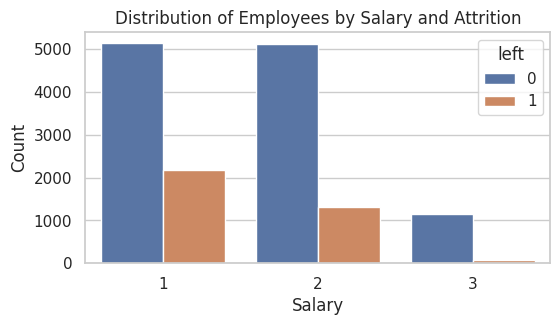

In [ ]:
# EDA for 'salary' distribution
plt.figure(figsize=(6, 3))
sns.countplot(data=new_df, x='salary', hue='left')
plt.title("Distribution of Employees by Salary and Attrition")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(title='left')
plt.show()

EDA for `salary` distribution


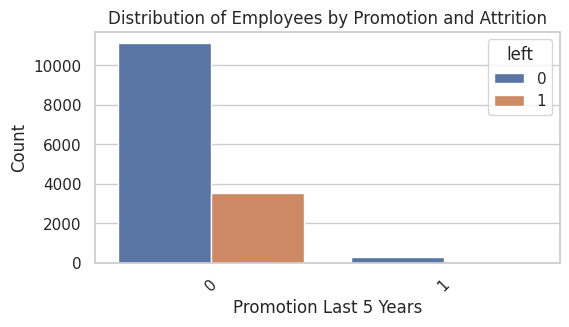

In [ ]:
# EDA for 'salary' distribution

plt.figure(figsize=(6, 3))
sns.countplot(data=new_df, x='promotion_last_5years', hue='left')
plt.title("Distribution of Employees by Promotion and Attrition")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(title='left')
plt.xticks(rotation=45)
plt.show()

EDA of `promotion_last_5years` distribution

In [ ]:
encoder = LabelEncoder()
new_df['left'] = encoder.fit_transform(new_df['left'])

<ipython-input-67-f20517cd4238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['left'] = encoder.fit_transform(new_df['left'])


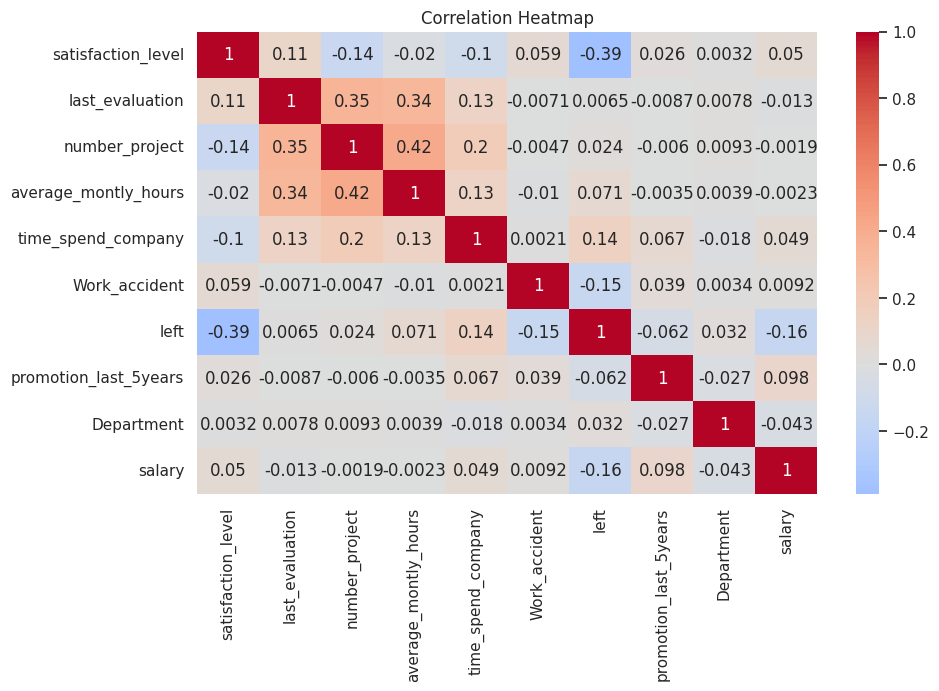

In [ ]:
# EDA for correlation heatmap
corr_matrix = new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105057,-0.142889,-0.019991,-0.100848,0.058715,-0.388410,0.025612,0.003151,0.049992
last_evaluation,0.105057,1.000000,0.349382,0.339786,0.131606,-0.007081,0.006464,-0.008675,0.007769,-0.013037
number_project,-0.142889,0.349382,1.000000,0.417278,0.196804,-0.004700,0.023609,-0.006049,0.009263,-0.001865
average_montly_hours,-0.019991,0.339786,0.417278,1.000000,0.127776,-0.010109,0.071133,-0.003532,0.003909,-0.002293
time_spend_company,-0.100848,0.131606,0.196804,0.127776,1.000000,0.002130,0.144765,0.067436,-0.018011,0.048700
Work_accident,0.058715,-0.007081,-0.004700,-0.010109,0.002130,1.000000,-0.154653,0.039249,0.003424,0.009230
left,-0.388410,0.006464,0.023609,0.071133,0.144765,-0.154653,1.000000,-0.061799,0.032107,-0.157803
promotion_last_5years,0.025612,-0.008675,-0.006049,-0.003532,0.067436,0.039249,-0.061799,1.000000,-0.027336,0.098111
Department,0.003151,0.007769,0.009263,0.003909,-0.018011,0.003424,0.032107,-0.027336,1.000000,-0.043078
salary,0.049992,-0.013037,-0.001865,-0.002293,0.048700,0.009230,-0.157803,0.098111,-0.043078,1.000000


# Split data for target variable and features

In [ ]:
X = new_df.drop(['left'], axis=1)
y = new_df['left']

In [ ]:
#Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [ ]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(knn_accuracy)

0.9363333333333334


# Logistic Regression

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter=5000)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(logreg_accuracy)

0.8026666666666666


# Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(dt_accuracy)

0.9516666666666667


# Model Performance Comparision

In [ ]:
# Generate confusion matrix and classification report for each model
models = ['KNN', 'Logistic Regression', 'Decision Tree']
predictions = [knn_predictions, logreg_predictions, dt_predictions]

In [ ]:
for model_name, y_pred in zip(models, predictions):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("="*50)
    print("\n\n")


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2299
           1       0.83      0.91      0.87       701

    accuracy                           0.94      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.94      0.94      3000




Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2299
           1       0.63      0.39      0.48       701

    accuracy                           0.80      3000
   macro avg       0.73      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000




Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2299
           1       0.88      0.92      0.90       701

    accuracy                           0.95      3000
   

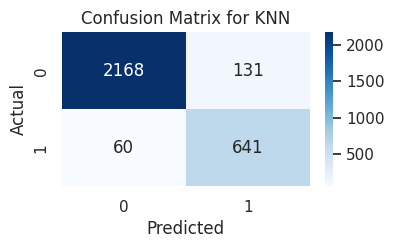

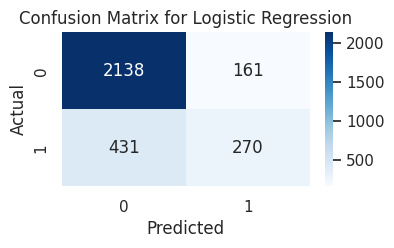

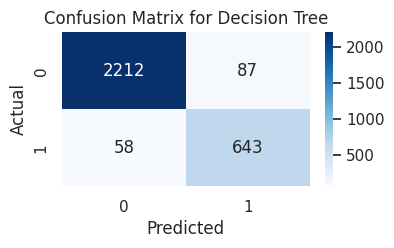

In [ ]:
for model_name, y_pred in zip(models, predictions):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n\n")

The analysis is of a classification task. we are predicting whether an employee will leave and promotion in 5 years (1) or not (0), based on various features. Classification is the correct approach for this kind of problem where the target variable is categorical and we want to assign instances to one of multiple classes.